# Wine Quality, Data Analytics DCS Final Project 2, Maruf Ahmed

### Decision Tree & Random Forest

* A decision tree and is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences,

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

### Aim
* This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality.



## Data

* This data frame contains the following columns:

* fixed acidity<br>
* volatile acidity<br>
* citric acid<br>
* residual sugar<br>
* chlorides<br>
* free sulfur dioxide<br>
* total sulfur dioxide<br>
* density<br>
* pH<br>
* sulphates<br>
* alcohol


**Note**: The data used is generated in CSV sheet.

### Work plan
* Analyze and explore the dataset <br>

* Building a Machine Learning Model using Decision tree and Random Forest Classifier<br>

* Test accuracy and run prediction using the machine learning model.

### Libraries used 

In [91]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
#plt.style.use("dark_background")
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
%matplotlib inline
from sklearn import datasets
from sklearn import tree
import plotly.graph_objects as go
import plotly.express as px
import sklearn

### Loading Data from CSV

In [92]:
#Importing the dataset
df = pd.read_csv("winequality-red.csv")

### Sample Data

In [93]:
#print the shape of dataset
df.shape

(1599, 12)

In [94]:
#Looking the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data is about a list of the projects and its parameters used by the City Council for **approval** for the Financial Year 2018.
The parameters used are its **priority, budget (in Euros), division, duration (in days)**

### Size of the Data

In [95]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [96]:
#Checking null value
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing value!

In [97]:
# Describe value data set in two decimel place
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


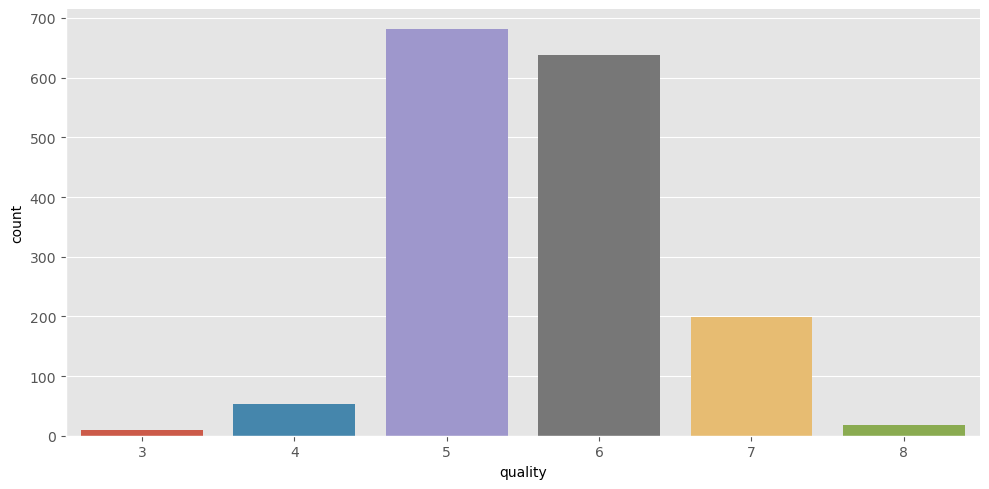

In [98]:
#Finding different quantity values, starts from 3, higher the value the better the wine quality

sns.catplot(x='quality', data=df, kind='count', height=5, aspect=2, )


In [99]:
# making Group by 

ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality', ylabel='volatile acidity'>

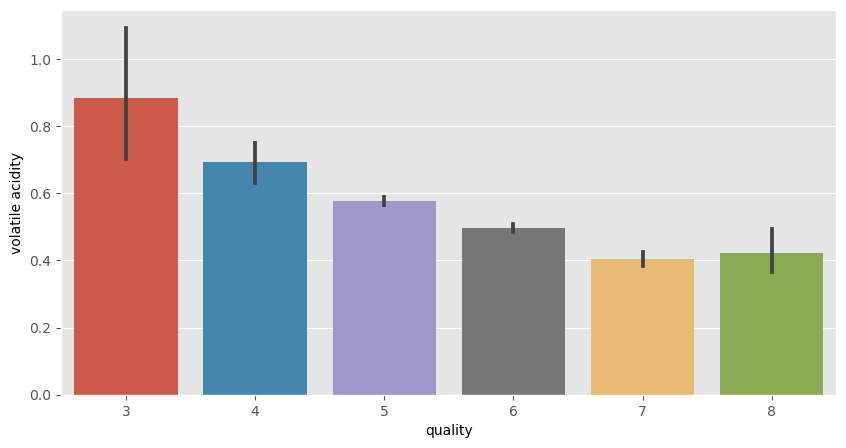

In [100]:
#When volatile acidity is high we are getting low quality wine, volatile acidity are inveresly proportional to the quality of wine.

plot =plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

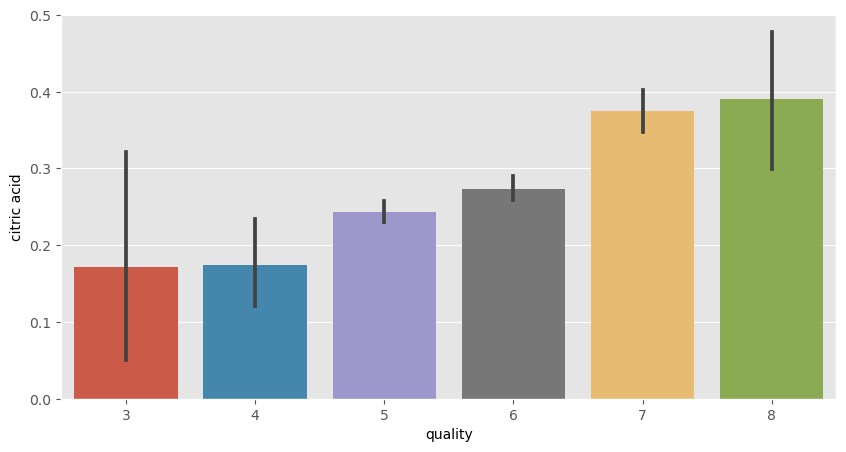

In [101]:
# When ccitric acid is more we are getting high quality wine, directly proportional.

plot =plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='citric acid', data=df)

<Axes: xlabel='quality'>

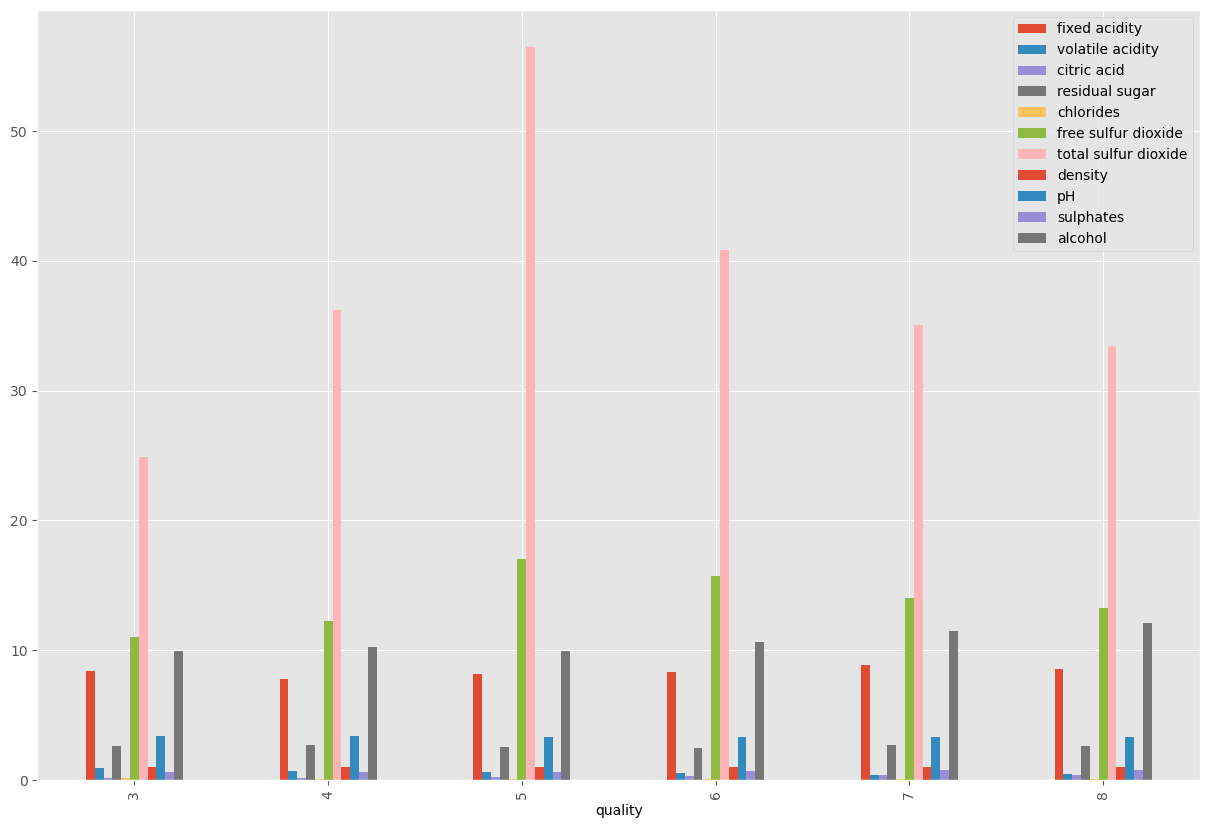

In [102]:
# graph the group by ❤️❤️❤️❤️

ave_qu.plot(kind="bar",figsize=(15,10))

Now we can see the effect of the elements on the quality 🎉

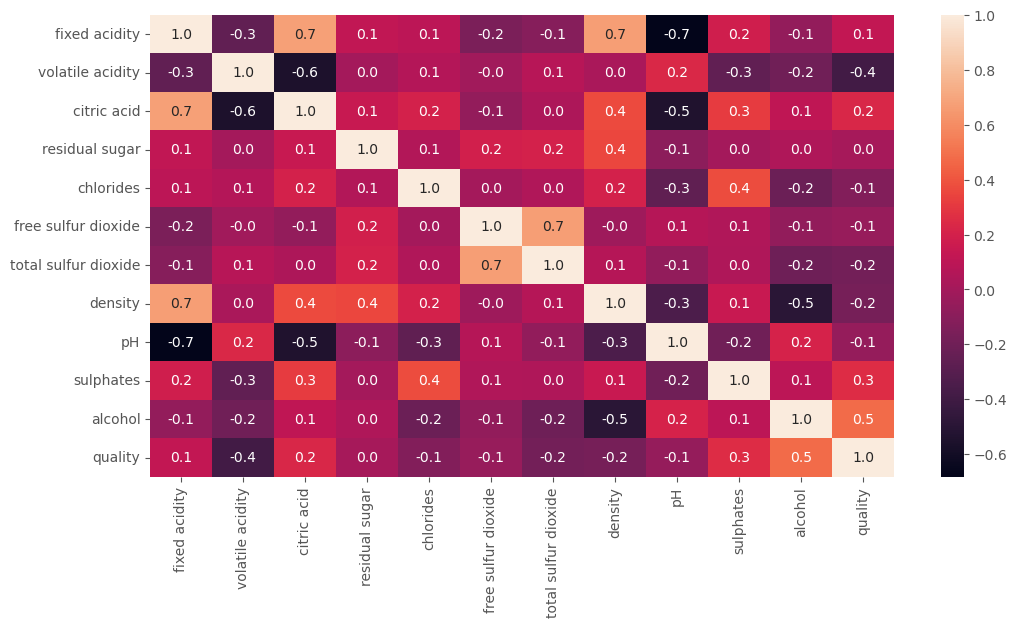

In [103]:
#Find the correlation using a heatmap, 


plt.figure(figsize = (12,6))
sns.heatmap(df.corr() , fmt= '.1f', annot = True)
plt.show()

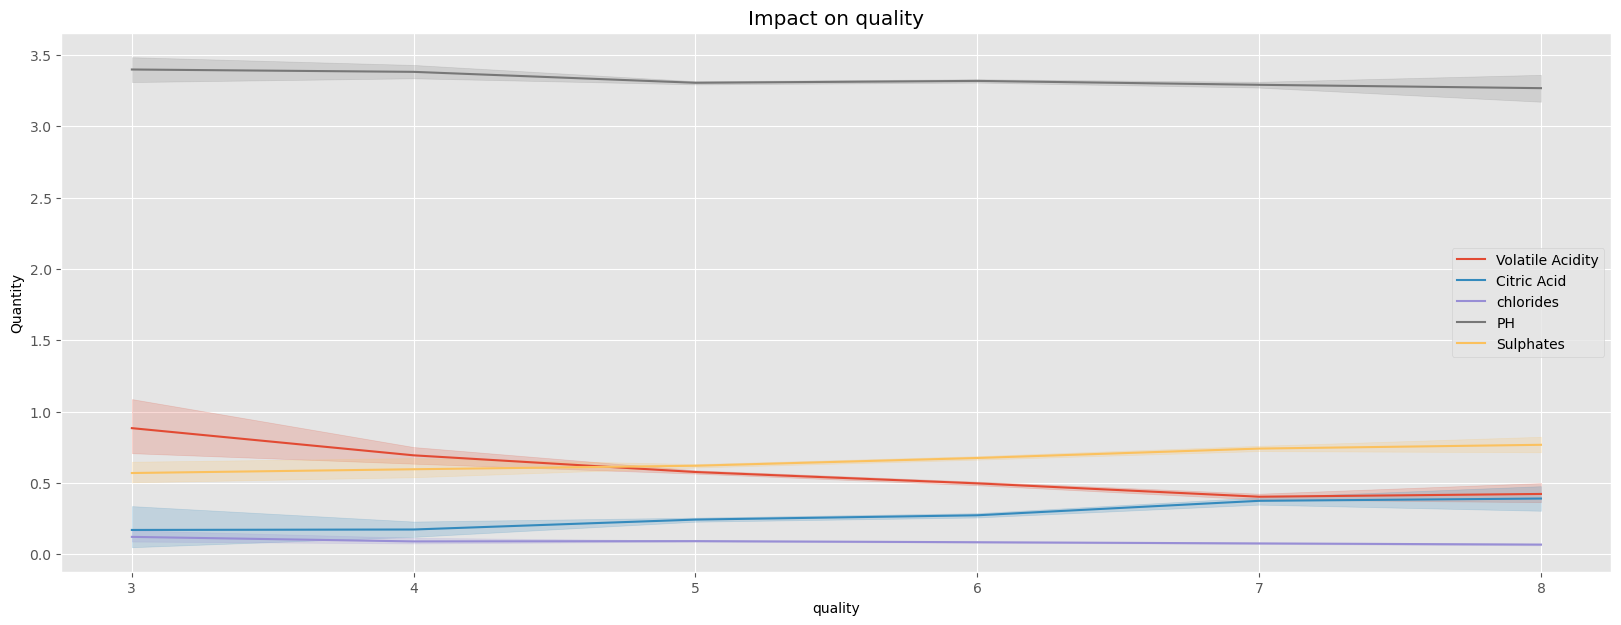

In [104]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

### Extracting feature names 

We see no high effect of this elements on the wine quality!

<Axes: xlabel='quality', ylabel='alcohol'>

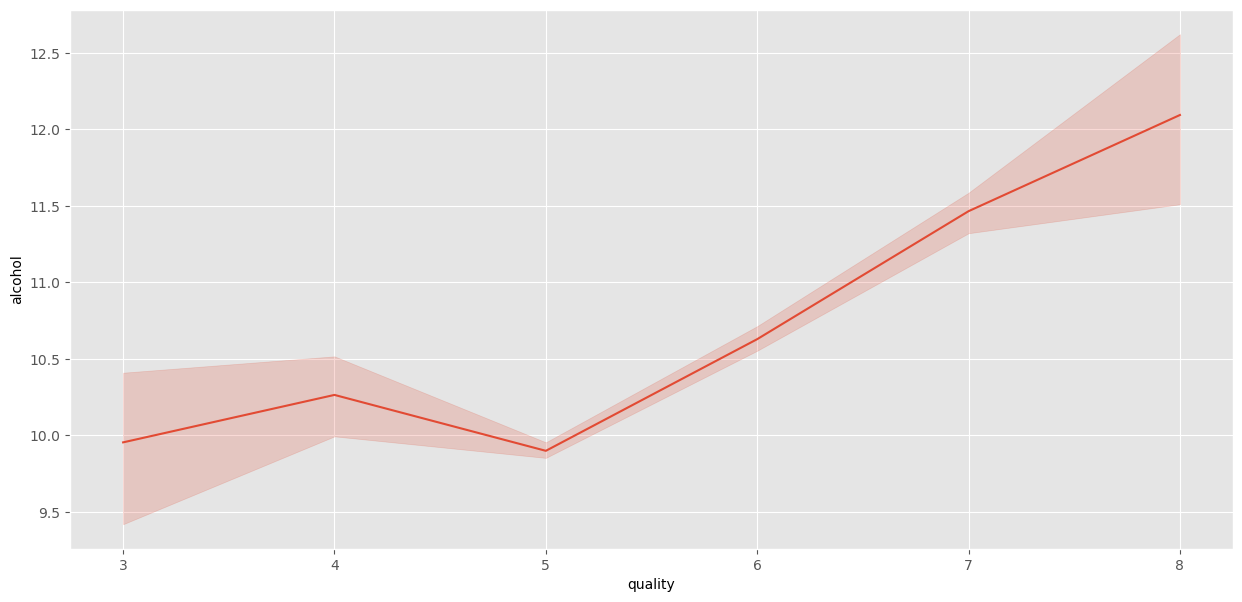

In [105]:
# effect the Alcohol in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

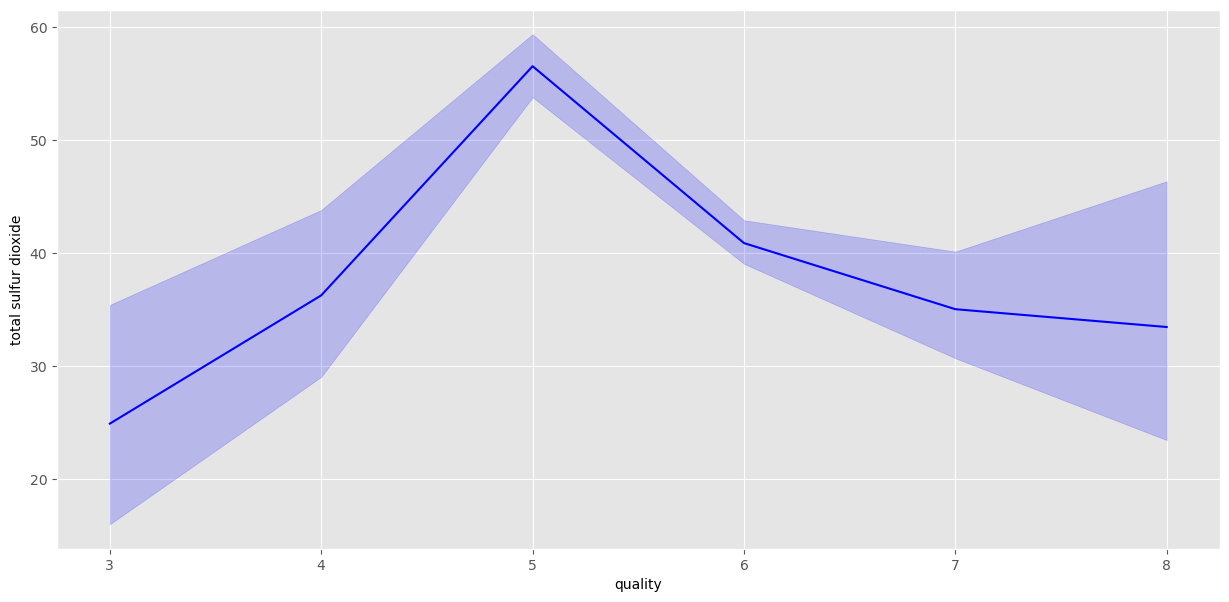

In [106]:
# effect the total sulfur dioxide in the quality
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")


<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

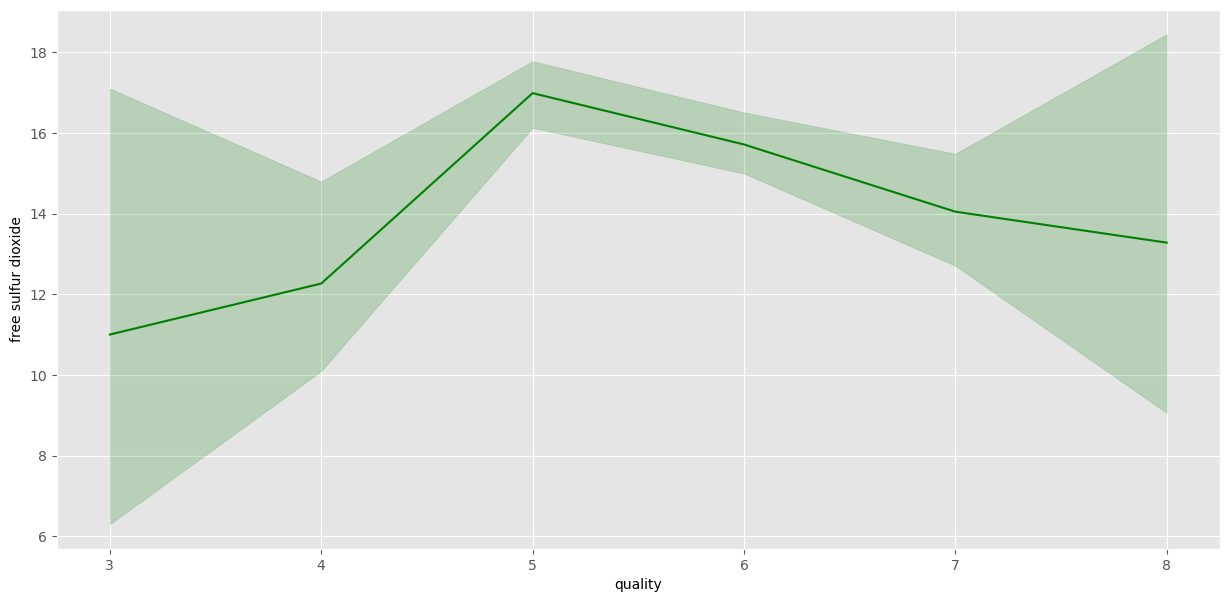

In [107]:
# effect of sulfur dioxide free in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")


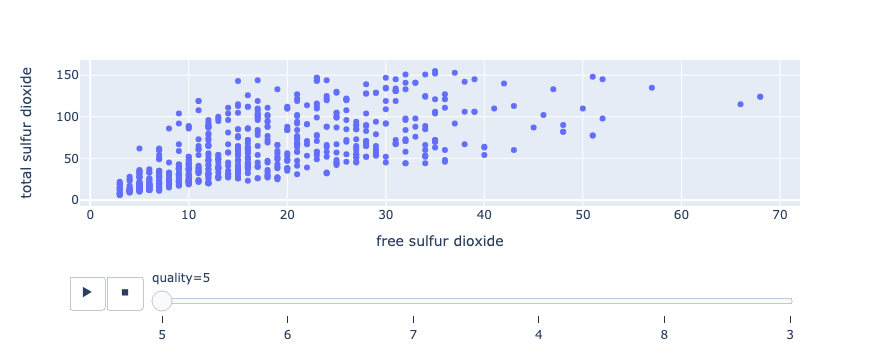

In [108]:
# using graph interactive to show the effect free and total - sulfur dioxide in the quality

px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

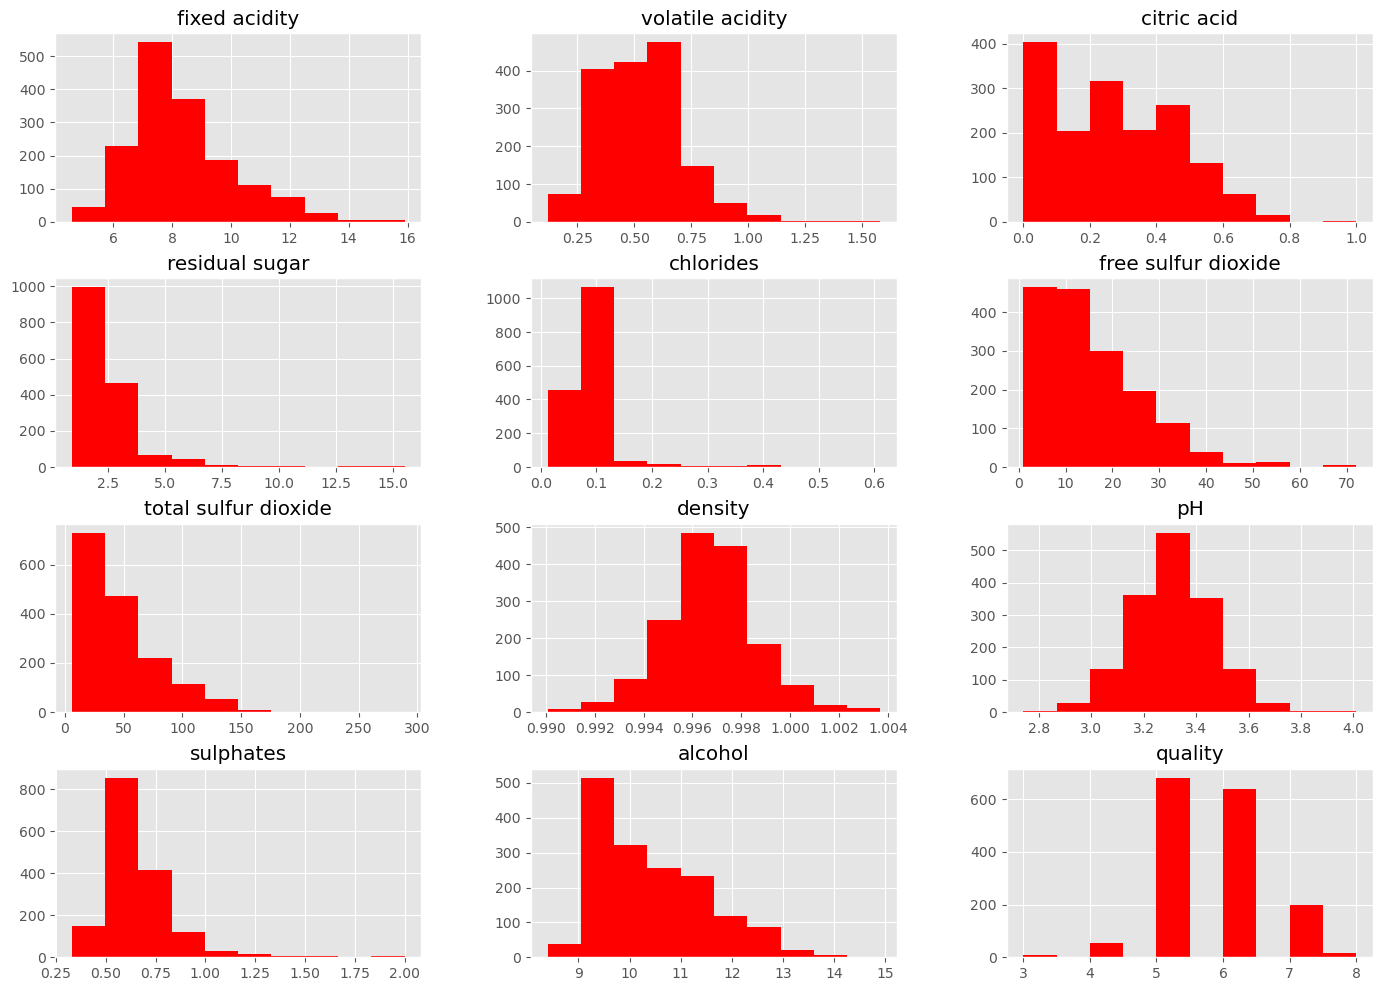

In [109]:
#Using Histogram

df.hist(figsize=(17,12),color='red')
plt.show()

#### OBSERVATION


* We have 5 types of quality in DataSet - 3 to 8 <br>




### The elements have highest effect on the quality of wine:<br>


1 - Alcohol<br>
2 - Free sulfur dioxide<br>
3 - Total sulfur dioxide<br>


The elements which have least effect on the quality of wine:<br>

1 - Fixed acidity<br>
2 - Volatile acidity<br>
3 - Citric acid<br>
4 - Residual sugar<br>
5 - Chlorides<br>
6 - Density<br>
7 - PH<br>
8 - Sulphates<br>

### Building Machine Learning Model

In [110]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR


In [111]:
#Defined X value and y value , and split the data train

X = df.drop(columns="quality")           
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0) #Label Binarization by applying lambda function

### TRAIN & TEST

In [112]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1199, 11)
X Test  :  (400, 11)
Y Train :  (1199,)
Y Test  :  (400,)


### *****Creating a Machine Learning Model*****

### @@@Decision Tree Classifier@@@

In [113]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Decision Treee Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Decision Treee Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Decision Treee Score the X-train with Y-train is :  0.9858215179316097
Decision Treee Score the X-test  with Y-test  is :  0.9025


### @@@@Random Forest Classifier@@@

In [114]:

Forest_model = RandomForestClassifier(random_state = 42)
Forest_model.fit(X_train, y_train)
accuracy_score(y_test, Forest_model.predict(X_test))

print("Score the X-train with Y-train is : ", Forest_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Forest_model.score(X_test,y_test))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.915


### MODEL EVALUATION

In [115]:
#For Decision Tree

print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : Accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [0 1]
 Model Evaluation Decision Tree : Accuracy score  0.9025


In [116]:
#For Random Forest

print("The classes ",Forest_model.classes_)

y_pred_T =Forest_model.predict(X_test)

print(" Model Evaluation Random Forest : Accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [0 1]
 Model Evaluation Random Forest : Accuracy score  0.915


### Model Building Deatiled Summary:

### *For Decision Tree Classifier*<br>
Score the X-train with Y-train is : 0.98<br>
Score the X-test with Y-test is : 0.89<br>
Accuracy score 0.89<br>


### *For Random Forest Classifier*<br>
Score the X-train with Y-train is : 1.0%<br>
Score the X-test with Y-test is : 0.91%<br>
Accuracy score 0.91%<br>



### Predictions

The use case here is to check if a wine will be selected as good quality wine for production: <br>


In [117]:
### Predicting wine quality  using decision tree
wine_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

wine_data_numpy_array = np.asanyarray(wine_data)
wine_data_reshaped = wine_data_numpy_array.reshape(1,-1)
Tree_model_prediction = Tree_model.predict(wine_data_reshaped)

print(Tree_model_prediction)


if(Tree_model_prediction[0]==1):
    print('According to Forest Treee Model its a Good Quality Wine')
else:
    print('According to Forest Treee Model its a Bad Quality Wine')
    
#print('Good Quality Wine' if prediction[0] == 1 else 'Bad Quality Wine')


[1]
According to Forest Treee Model its a Good Quality Wine


/Users/munshimarufahmed/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [118]:
### Predicting wine quality using Random Forest
wine_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

wine_data_numpy_array = np.asanyarray(wine_data)
wine_data_reshaped = wine_data_numpy_array.reshape(1,-1)
Forest_model_prediction = Forest_model.predict(wine_data_reshaped)


print(Forest_model_prediction)

if(Forest_model_prediction[0]==1):
    print('According to Forest Model its a Good Quality Wine')
else:
    print('According to Forest Model its Bad Quality Wine')

[1]
According to Forest Model its a Good Quality Wine


/Users/munshimarufahmed/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



### Conclusion

The Decision Tree and Random Forest classifier was used to create a model to predict best key factors before the company create a new selection of wine.

###                          @@@@@@@@@@@@ THANK YOU @@@@@@@@@@@